# Un ejemplo de uso del módulo CML de C++, comparado con la implementación de NumPy

In [2]:
#Librería de C++ que resuelve Cuadrados Mínimos Lineales
import CML
#Para crear matrices e interfacear con Eigen en C++
import numpy as np
#Para hacer los gráficos
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

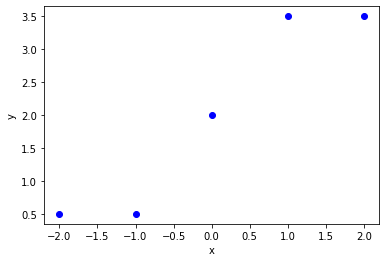

In [4]:
#EJEMPLO
xi = np.array([-2 , -1 , 0 , 1 , 2], dtype=float)
yi = np.array([ 0.5 , 0.5 , 2 , 3.5 , 3.5], dtype=float)


plt.plot(xi,yi,'bo');

plt.xlabel("x")
plt.ylabel("y")

In [5]:
unos = np.ones(10)
ceros = np.zeros(10)

np.stack([unos, ceros], axis=1)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [6]:
# TODO: Armar matriz A
n = len(xi)
A = np.stack([np.ones(n), xi], axis=1)

In [7]:
# TODO: Calcular A^T A y A^T b
AtA = A.T @ A
Atb = A.T @ yi
a_0, a_1 = np.linalg.solve(AtA, Atb)
print("Solución de NumPy:",a_0, a_1)

a = CML.resolver(A,yi)
print("Solución de nuestro módulo CML:",a)

Solución de NumPy: 2.0 0.9
Solución de nuestro módulo CML: [2.  0.9]


In [8]:
xs = np.arange(-2.5,2.5,0.1)

Text(0, 0.5, 'y')

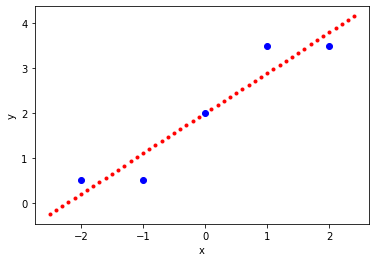

In [9]:
#Usando nuestra propia solución
y_pred = a[0] + a[1] * xs

plt.plot(xs, y_pred, "r.");
plt.plot(xi, yi, "bo");
plt.xlabel("x")
plt.ylabel("y")

In [10]:
#Otro ejemplo
xi = np.array([0 , 0.15 , 0.31 , 0.5 , 0.6 , 0.75])
yi = np.array([1.0 , 1.004 , 1.031 , 1.117 , 1.223 , 1.422])

In [11]:
A_full = np.stack([xi**0, xi, xi**2, xi**3, xi**4], axis=1)

Diferencias entre lo calculado por NumPy y lo calculado por nuestro módulo CML:
 [1.1102230246251565e-16, 2.220446049250313e-16, 1.1102230246251565e-15, 1.0547118733938987e-14, 1.3766765505351941e-14, 3.1086244689504383e-15, 1.0204771055954964e-13, 3.4914952873332794e-13, 2.9687363678476686e-13, 1.4432899320127035e-14, 1.4120926650207366e-12, 9.758527319547738e-12, 2.0552004542651048e-11, 1.3375300866869111e-11]


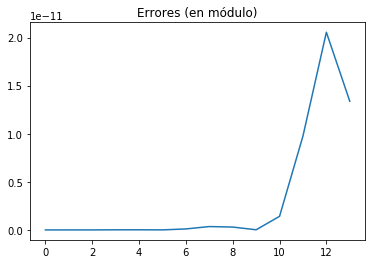

In [13]:
solsNumPy = []
solsCML = []
for i in range(1, 5):
    A = A_full[:, :(i+1)]
    AtA = A.T @ A
    Atb = A.T @ yi
    solsNumPy.append(np.linalg.solve(AtA, Atb))
    solsCML.append(CML.resolver(A,yi))
#¿Qué tan grande es la diferencia entre la solución de NumPy y la nuestra?
errores = [(x-y).tolist() for x, y in zip(solsNumPy, solsCML)]
erroresFlat = [item for sublist in errores for item in sublist]
erroresFlat_abs = [abs(error) for error in erroresFlat]
print("Diferencias entre lo calculado por NumPy y lo calculado por nuestro módulo CML:\n", erroresFlat_abs)
plt.title("Errores (en módulo)")
plt.plot(range(len(erroresFlat_abs)),erroresFlat_abs)

# Ejemplo de regresión lineal múltiple

In [3]:
#f(x,y)= -2x^2 + 2x - y^2 + y
#Modelo de función f'(x,y) = b0*x^2 + b1*x + b2*y^2 + b3*y
#Tomo algunos puntos de esta función, con sus correspondientes imágenes. Obtengo la solución de CML para el sistema Ax=b y me fijo que los coeficientes sean los correctos.
Xs = np.array([0.0,0.0,1.0,1.0,0.5,2.0,3.0,0.0,0.0])
Ys = np.array([0.0,1.0,0.0,1.0,0.5,0.0,0.0,2.0,3.0])
b = np.array([0.0,0.0,0.0,0.0,0.75,-4,-12,-2,-6])

A = np.stack([Xs**2,Xs,Ys**2,Ys], axis=1)

print("Matriz A:\n",A)

sol = CML.resolver(A,b)

#Debería dar -2, 2, -1, 1.
print("Solución:\n", sol)

print("RMSE:\n", CML.RMSE(A,sol,b))
print("NRMSE:\n", CML.NRMSE(A,sol,b))

Matriz A:
 [[0.   0.   0.   0.  ]
 [0.   0.   1.   1.  ]
 [1.   1.   0.   0.  ]
 [1.   1.   1.   1.  ]
 [0.25 0.5  0.25 0.5 ]
 [4.   2.   0.   0.  ]
 [9.   3.   0.   0.  ]
 [0.   0.   4.   2.  ]
 [0.   0.   9.   3.  ]]
Solución:
 [-2.  2. -1.  1.]
RMSE:
 1.6156616750357267e-15
NRMSE:
 1.2671856274790013e-16
